# **Support Vector Regression:**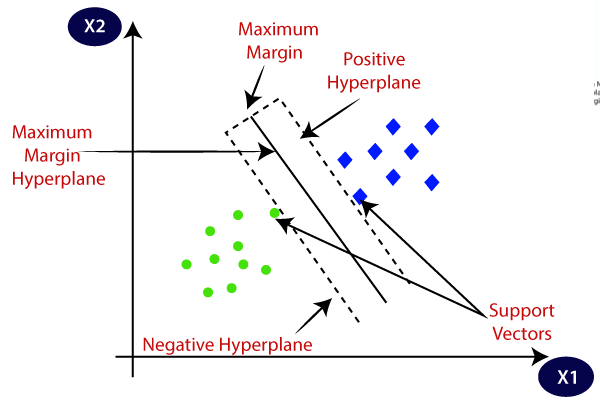

**SVR stands for support vector regression. The basic idea behind the support vector regression is find the best fit line. Unlike other regression model try to minimize the error between real and predicted value but SVR try to find the best fit line within the thresold. The thresold value is the distance between the hyperplane and boundry line.:**

# **Importing libraries:**

In [99]:
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
import seaborn as sns

# **Loading the dataset:**

In [100]:
data = pd.read_csv("Position_Salaries.csv")

In [101]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# **Dependent and independent variable:**

In [102]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [103]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [104]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [105]:
y = y.reshape(len(y),1)

In [106]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

# **Scalling of data:**

In [107]:
from sklearn.preprocessing import StandardScaler
first = StandardScaler()
second = StandardScaler()
x = first.fit_transform(x)
y = second.fit_transform(y)

In [108]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [109]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# **Training and testing of data:**

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3,random_state = 0)

# **Support vector regression model:**

In [111]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# **Predict the result :**

In [112]:
second.inverse_transform(regressor.predict(first.fit_transform([[6]])).reshape(-1,1))

array([[149234.98704549]])

# **Now visualize the result:**

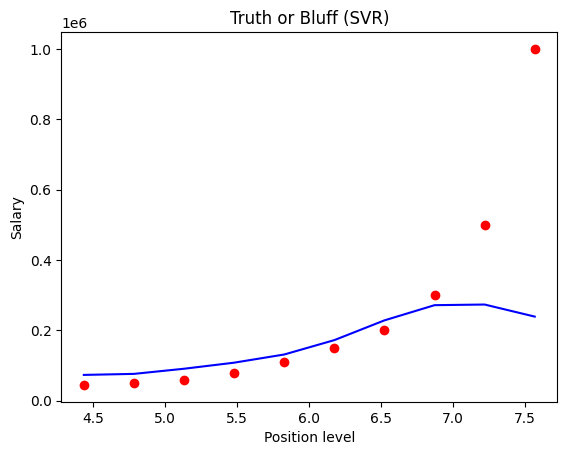

In [113]:
plt.scatter(first.inverse_transform(x), second.inverse_transform(y), color = 'red')
plt.plot(first.inverse_transform(x), second.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# **Visualising the SVR results (for higher resolution and smoother curve)**

<ipython-input-115-8f8251735a34>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(first.inverse_transform(x)), max(first.inverse_transform(x)), 0.1)


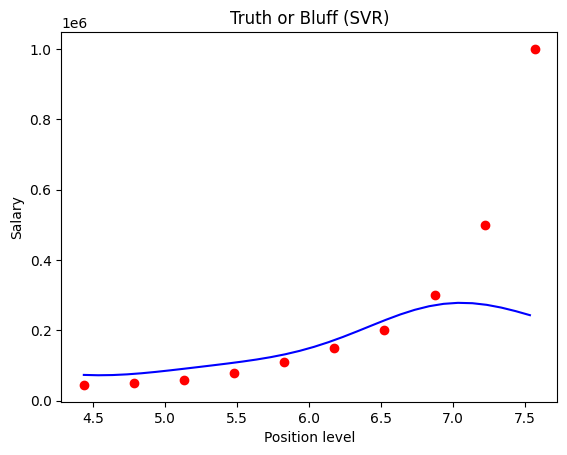

In [115]:
X_grid = np.arange(min(first.inverse_transform(x)), max(first.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(first.inverse_transform(x), second.inverse_transform(y), color = 'red')
plt.plot(X_grid, second.inverse_transform(regressor.predict(first.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()